# Imai and Keane (2004)

This notebook will explore and replicate the lifecycle savings and labor supply model of [Imai and Keane (2004)](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1468-2354.2004.00138.x). I will first introduce their model with their notation and discuss a few key findings of the paper. Then I will turn to the replication exercise, introducing a [simplified version of the model](#simplified-model) and then presenting the [code](#code) and showing some comparative results.

The main goal of the paper is to reconcile the macro- and micro- estimate of the intertemporal elasticity of subsitition in labor supply. Imai and Keane conclude that estimates from the microeconomic literature are often biased towards zero because they ignore human capital effects (of course, this was more true at the time of publication than it would be today). By human capital, they refer to endogeneous wages which are accumulated through a *learning by doing* process: an hour of work today increases my wages in the future. Once human capital is accounted for, they find a fairly high i.e.s. of 3.82, in line with the numbers used in macro models.

The key intuition is shown in figure 1 from their paper, recreated here:

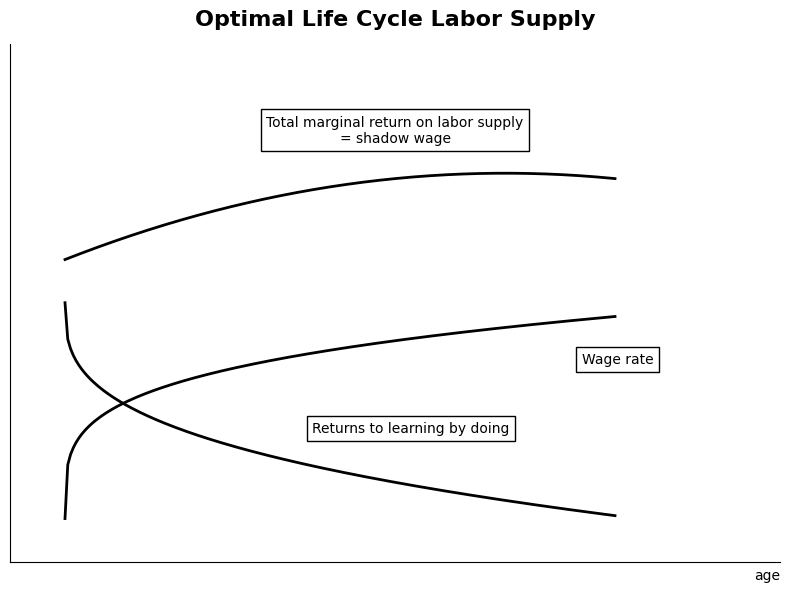

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Set up the axes
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Remove default axis labels
ax.set_xlabel('')
ax.set_ylabel('')

# Add custom axis labels
ax.text(7, -0.2, 'age', ha='right')

# Plot the curves
x = np.linspace(0, 5, 200)

# Wage rate
y1 = (6*x)**(1/4) + 0.5
ax.plot(x+0.5, y1, 'k-', linewidth=2)
ax.text(5.2, 2.3, 'Wage rate', bbox=dict(facecolor='white', edgecolor='black'))

# Returns to learning by doing
y2 = -(3*x)**(1/3) + 3
ax.plot(x+0.5, y2, 'k-', linewidth=2)
ax.text(2.75, 1.5, 'Returns to learning by doing', bbox=dict(facecolor='white', edgecolor='black'))

# Total marginal return (shadow wage) - Shifted upwards
x3 = np.linspace(1, 6, 200)
y3 = 2 - ((x3-1)/4 - 1)**2 + 2.5  # Increased the constant from 2 to 2.5 for upward shift
ax.plot(x3-0.5, y3, 'k-', linewidth=2)
ax.text(3.5, 5.0, 'Total marginal return on labor supply\n= shadow wage', 
        bbox=dict(facecolor='white', edgecolor='black'), ha='center', va='center')

# Set limits
ax.set_xlim(0, 7)
ax.set_ylim(0, 6)

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

# Add title
plt.title('Optimal Life Cycle Labor Supply', y=1.02, fontsize=16, fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()

The intuition is this. An hour of work today rewards the agent with a wage, but it also increases utility through the rest of the lifecycle by increasing future wages and thus earnings. At younger ages, the returns to work may be much larger than the wage because increased human capital brings significant returns during later years of work. When agents are older, their wages are higher but the returns to increased human capital are lower because they have fewer future years of work. The net result is a reasonably flat *shadow wage* which captures the net returns to work.

If the econometrician focuses solely on the variation between hourly wage and hours of work, the reasonably flat lifetime profile of hours and reasonably steep profile of wages will erroneously suggest a weak relationship between the two. Accounting for the full returns to work inclusive of human capital accumulation leads to a much higher responsiveness and leads to the higher i.e.s. that Imai and Keane find.

## The model

Now I will present the full model from Imai and Keane (2004).

#### Utility 

Agents receive utility from consumption, given by a CRRA specification. In order to discourage agents from borrowing when young to smooth consumption across the lifecycle, the authors introduce *age effects* into utility. They do so with a linear spline $A(s_t)$ where $s_t$ is the agent's age at time period $t$. $A(s_t) = C_0 C_1$ at age 20, gradually moves to $C_0 C_2$ at age 25, and ends at $C_0$ at age 33, whree it remains for the rest of the lifecycle. Thus utility from consumption is:

$$
u(c_t) = \dfrac{c_t^{\alpha_1}}{\alpha_2}
$$

Where $\alpha_1 < 1$. Agents incure disutility from hours worked, which similarly follows a CRRA specification and is subject tp a lognormal shock:

$$
v(h_t,\epsilon_{2t}) = \epsilon_{2t} b \dfrac{h_t^{\alpha_2}}{\alpha_2}
$$

Where $b > 0$ and $\alpha_2 > 1$. 

The budget constraint is given by:

$$
A_{t+1} = (1 +r)A_t + W_{t,s} h_t - c_t
$$

Where $W_{t,s}$ is he hourly wage and $r$ is the risk-free interest rate and is set to 0.05. 

Agents will choose control variables $h_t$ and $c_t$ to maximize their lifetime expected value:

$$
V_{t,s}(A_t, K_t, \epsilon_{2,t}) = \text{max}_{c_t,h_t} \{A(s_t) u(c_t) - v(h_t,\epsilon_{2t}) + \beta E \left[ V_{t+1, s+1} (A_{t+1}, K_{t+1}, \epsilon_{2,t+1} ) \right]\}
$$

Where $\beta$ is the discount factor.

#### Human capital

Wages are determined by human capital in a perfectly competitive labor market. Workers receive a rental rate $R_k$ for their human capital. Because the market is competitive and human capital is homogeneous, the wage rate is:

$$
W_t = R_k K_t
$$

The law of motion for human capital is:

$$
\tilde{K}_t(K_t, h_t, t) = k_0 + \delta K_t + G(K_t, h_t, t)
$$

$k_0$ is a wage intercept (which can be thought of as a minimum wage, since this is the minimum level of human capital any agent can have), $\delta$ is a depreciation rate, and $G(K_t, h_t, t)$ is the human capital production function. $G$ is given by:
$$
G(K_t, h_t, t) = A_0(1 + A_1(t-19))(B_1 + K_t)\left[(h_t + d_1)^{\alpha} - B_2(h_t + d_1) \right]
$$

This function is designed to account for several features seen in the data:

1. The percentage increase in human capital due to hours of work is larger for workers with higher wages, suggesting complementarity between learning and the level of human capital. This is captured by $(B_1 + K_t)$.
2. There appears to be a lower bound for $G$ when $h_t = 0$, given by the intercept $d_1$.
3. At high levels of $h_t$, returns to work may decrease or even become negative. This is given by the term $-B_2(h_t + d_1)$.
4. Human capital accumulates more slowly as workers age, given by the age term $( 1 + A_1(t - 19))$ (since the model begins at age 20 in t=1, if $A_1<0$ this means a lower return in later periods).

Finally, human capital accumulation is uncertain and subject to a wage shock $\epsilon_{1,t}$:

$$
K_{t+1} = \tilde{K}_t \epsilon_{1,t}
$$

#### Uncertainty

Both the wage and taste shocks are i.i.d. mean one lognormally distributed:

$$
\log ( \epsilon_{i,t} ) \sim N(-\frac{1}{2} \sigma_i^2, \sigma_i)~~\text{for } i = 1, 2
$$

#### Timeline

The model is annual, beginning at age 20 and ending at age 65. Agents receive value from any assets remaining after the terminal period, representing retirement and a bequest motive. The value of savings from period $T$ is given by:

$$
V_{T+1}\left(A_{T+1}\right)= \begin{cases}3 \log \left(A_{T+1}+\phi\right)-1-3 \log (\phi) & \text { if } A_{T+1}>0 \\ \left(\frac{A_{T+1}-\phi}{\phi}\right)^3 & \text { otherwise }\end{cases}
$$

This is chosen so that the function is continuous at 0 and agents may end the problem with negative assets. $\phi$ is calibrate to 100,000.

#### Heterogeneity

Schooling is taken as given, but the authors divide the agents up into four possible education groups:
1. High school dropout
2. High school graduate
3. Some college
4. College graduate

And the utility function parameters $b, C_0, C_1, C_2$ and $K_0, \delta, A_0, A, \alpha$ are estimated separately for each education group. 

#### Solution and estimation

The model is solved using standard backward-induction of the value function. Because there is no uncertainty remaining in period $T$, the model has a straightforward solution for labor supply and savings based on the state variables. Given a finite grid of $n_k$ points for human capital and $n_A$ points for assets, we can calculate optimal consumption, optimal labor supply, and value at each point.

In period $T-1$, we again would like to solve for the value and optimal policy at $n_k \times n_A$ grid points. However, we do so with respect to the *expected* value in period $T$, since we face uncertainty both about what our wage will be in that period as well as our labor supply taste shock. The most onerous way to do this would be to do a 2-dimensional grid search over $c_{T-1}, h_{T-1}$. Given a state $A_{T-1}, K_{T-1}$, we calculate the deterministic utility today and then the *expected* utility in the next period using a quadrature integration over both possible shocks. In order to reduce the computational burden of the problem, the authors use Gauss-Hermite quadrature to integrate the value function in period $T$ with respect to the taste shocks and then use a Chebyshev polynomial to approximate the integration with respect to wage shocks. Essentially, for each value of assets on the grid the authors fit a Chebyshev polynomial for the expected value with respect to taste shocks as a function of log human capital; the integration with respect to human capital shocks is then accomplished without interpolation, simply by plugging in the quadrature points of human capital. This reduces the overhead in each search for the optimal policy in period $T-1$. The method then iterates backwards until the problem is solved.

The model is estimated using data on white, male workers from the NLSY79. The authors use a measurement-error based simulated maximum likelihood approach. That is, they assume that human capital, assets, savings and hours are each observed in the data with a noisy measurement error (either additively normal or multiplicatively log-normal). Once the model is solved, the authors simulate $M$ paths based on draws from the initial distributions of human capital $K_{0}$ and assets $A_{0}$. For each combination of person $i$ from the data and simulated path $m$, we derive the contribution to the likelihood as the probability that the measurement error is equal to the difference between simulated path $m$ and the observed path of individual $i$.

## Simplified model

Now I will begin the attempt at replication. This still a work in progress, and this notebook only contains partial results.

In large part, this is due to the computational burden of solving the maximization problem with two state variables. In order to test the accuracy of the approximations that the authors made, I will attempt to solve their model without the use of Chebyshev polynomials. However, when I implemented a straightforward value-function iteration solution to the problem with continuous consumption and labor supply but *without* endogeneous wages, it already took several minutes to solve with even a moderate number of grid points. Further, later in life the value function appears to have large flat regions with respect to wages which raised concerns about numerical errors when performing the 2-D search on the next period value.

In addition, I want to test the robustness of the estimation and identification from their measurement-error maximum likelihood approach to that of a more straightforward simulated method of moments strategy. In order to do this, I need to be able to solve the model quickly.

I will do so using a variation on the endogeneous grid method for a problem with multiple state and control variables. However, this turns out to not be straightforward. As a result, I will here present a scaled down consumption-savings and labor supply problem of a similar flavor to the model of Imai and Keane but without human capital accumulation. I will show the solution method, demonstrate some comparative statics, and then outline next steps for extending it to accomplish the full replication.

### Simple model

As before, agents receive CRRA utility from consumption:

$$
u(c_t) = \dfrac{C_t^{1-\gamma}}{1-\gamma}
$$

where I do *not* include the age effects. This feature of the original model is unusual in this literature and ultimately not necessary to capture the behavior they describe. Disutility from labor is similarly:

$$
v(h_t) = \alpha \dfrac{h_t^{\eta}}{\eta}
$$

An agent's state is defined by a certain level of *market resources* $M_t$ that are available for them to divide between consumption $c_t$ and end-of-period savings $A_t$ and their level of human capital $K_t$. Unlike in the original model, agents receive income from work in period $t$ in period $t+1$. Agent's receive interest on $A_t$ of $R$, leading to the budget constraint:

$$
\begin{align}
M_{t+1} &= R A_t + h_t K_t \\
    &= R (M_t - c_t) + h_t K_t
\end{align}
$$

Wages grow at a declining rate across the lifecycle given by $G(s_t)$ and are subject to a log-normal shock $\epsilon_t$:

$$
K_{t+1} = K_t G(s_t) \epsilon_t
$$

Where 

$$
\log ( \epsilon_{t} ) \sim N(-\frac{1}{2} \sigma^2, \sigma)
$$

I do not include the taste shocks to labor supply. Agents maximize their total expected lifetime value, so that their problem in periods $t < T$ is:

$$
V_{t,s}(A_t, K_t) = \text{max}_{c_t,h_t} \{ u(c_t) - v(h_t) + \beta E \left[ V_{t+1} (A_{t+1}, K_{t+1}) \right]\}
$$

Agents retire at age 65, and at age 66 receive a terminal period value which is set to:

$$
V_{T+1}(M_{T+1}) = \phi \dfrac{M_{T+1}^{1-\gamma}}{1-\gamma}
$$

#### Period $T$

In period T there is no labor supply decision. Agents choose $c_t$ which satisfies:

$$
\begin{align}
V_T(M_T) &= \text{max}_{c_T} \{ u(c_T) + \phi \dfrac{M_{T+1}^{1-\gamma}}{1-\gamma} \} \\
&= \text{max}_{c_T} \{ u(c_T) + \phi \dfrac{ \left( R(M_T - c_T) \right) ^{1-\gamma}}{1-\gamma} \}
\end{align}
$$

This problem has the first order condition:

$$
\begin{align}
u'(c_T) & = R \phi M_{T+1}^{-\gamma} \\
& \iff \\
c_T^{-\gamma} &= R \phi (R(M_T - c_T))^{-\gamma} \\
c_T & = (R \phi)^{-1/\gamma} R(M_T - c_T) \\
c_T & =  \dfrac{(R \phi)^{-1/\gamma}}{1 +  (R \phi)^{-1/\gamma}} M_T
\end{align}
$$

So the analytical solution for period $T$ is to consume a fraction of resources $M_T$ given by:

$$
\pi_T \equiv \dfrac{(R \phi)^{-1/\gamma}}{1 +  (R \phi)^{-1/\gamma}} 
$$

This holds no matter what the agent's level of human capital is because work no longer factors into the problem.

#### Period $T - 1$

In $T-1$ the agent's first order condition with respect to consumption is given by:

$$
\begin{align}
u'(c_{T-1}) &= \beta R u'(c_T) \\
c_{T-1} &= (\beta R)^{-1/\gamma} c_T
\end{align}
$$

Where there is no uncertainty because $K_{T}$ does not inftyluence $c_T$. It will be convenient to define $\lambda \equiv (\beta R)^{-1/\gamma}$.

The first order condition for labor supply is:

$$
\begin{align}
0 &= v'(h_{T-1}) + K_{T-1} \beta u'(c_T) \\
\alpha h_{T-1}^{\eta - 1} &= \beta K_{T-1} c_{T}^{-\gamma} \\
h_{T-1} &= \left( \frac{\beta}{\alpha} K_{T-1} c_{T}^{-\gamma} \right)^{\frac{1}{1-\eta}}
\end{align}
$$

We know that $c_T = \pi_T \left( R(M_{T-1} - c_{T-1}) + h_{T-1} K_{T-1} \right) $, but the exponents mean there is no analytical solution for $C_{T-1}$ and $h_{T-1}$.

We use the first order conditions to perform the EGM step. Starting with a grid of optimal $c_T$ for $n_M$ grid points of $M_T$ and $n_K$ grid points of $K_T$, we find $c_{T-1}$ which satisfies the first order condition for consumption and $h_{T-1}$ which satisfies the FOC for labor supply. This gives us a pair of optimal choices in $T-1$ associated with a particular state in $T$:

$$
\{ (c_{T-1},h_{T-1}), (M_{T,i},K_{T,j})\}_{i\leq n_M,j \leq n_K}
$$

Recognizing that to end at $K^{\prime}_{T,j}$ in expectation, it must be the case that we began at $K_{T-1,j}$ such that 

$$
E[K_{T,j}] = G(s_{T-1}) K_{T-1,j} = K^{\prime}_{T,j}
$$

We can further say that our EGM point is associated with $K^{\prime}_{T-1,j} = G(s_{T-1})^{-1} K^{\prime}_{T,j}$. Solving the budget constraint for $M_{T-1}$ gives us:

$$
M_{T-1} = \dfrac{M_T - K_{T-1} h_{T-1}}{R} + c_{T-1}
$$

So that we now have an EGM point of optimal $c_{T-1}, h_{T-1}$ associated with a specific state $M_{T-1}, K_{T-1}$.

Unlike in standard EGM, this does not result in a *grid* in period $T-1$. Every optimal point in period $T$ associated with human capital grid point $K_{T,j}$ is mapped back to the same level of human capital in period $T-1$ $K_{T-1,j}$ because human capital evolves the same regardless of hours worked. However, every optimal point associated with $M_{T,i}$ will be mapped back to a *different* level of $M_{T-1}$ because $M_T$ evolves according to $h_{T-1}$. Thus the EGM step leads to a series of optimal points in period $T-1$:

$$
\{ \{ (c_{T-1},h_{T-1}), (M_{T,i},K_{T,j})\}_{j \leq n_K} \}_{i\leq n_M \times n_K}
$$

In order to perform interpolation when we simulate agents' choices, we need to impose some regularity on this "twisted" grid. We do so by looping through the grid points of $K_{T-1}$ and interpolating the optimal choices of the control variables on the same set of $n_M$ regularised grid points for $M_{T-1}$.

#### Limiting solution

In order to extrapolate above the maximum value of $M_{T-1}$ given in the EGM step, I use the limiting solution as $M_{T-1} \to \infty$. Since $c_t$ is strictly increasing in $M_t$, the marginal value of consumption $u'(c_t) \to 0 $ as $M_{T-1} \to \infty$. From the FOC for $h_t$ we can then see that $h_t$ also must go to 0. This is intuitive, since working brings disutility which becomes less and less worth it as the marginal value of an extra dollar of labor income goes to 0.

As $h_t \to 0$, the agents' problem reduces to a simple "cake-eating" one. Specifically, in $T-1$ it becomes:

$$
\begin{align}
V_{T-1} (M_{T-1},K_{T-1} | M_{T-1} \to \infty) &= \text{max}_{c_{T-1}} \{ u(c_{T-1}) + \beta V_T(M_T, K_T)  \} \\
& = \text{max}_{c_{T-1}} \{ u(c_{T-1}) + \beta V_T( R(M_{T-1} - c_{T-1}), K_T)  \} 
\end{align}
$$

Since we have an analytical solution for the level of consumption in $T$, the FOC is:

$$
\begin{align}
c_{T-1}^{-\gamma} &= \beta R \left( \pi_T R(M_{T-1} - c_{T-1}) \right){-\gamma} \\
c_{T-1} &= \lambda \left( \pi_T R(M_{T-1} - c_{T-1}) \right) \\
c_{T-1} &= \dfrac{\lambda R \pi_T}{1 + \lambda R \pi_T} M_{T-1}
\end{align}
$$

So we can define:

$$
\pi_{T-1} \equiv \dfrac{\lambda R \pi_T}{1 + \lambda R \pi_T}
$$

As the limiting solution for $c_{T-1}$ as $M_{T-1} \to \infty$ (and $h_{T-1} \to 0$). A similar solution will hold in each period $t \leq T-1$:

$$
\pi_{t} \equiv \dfrac{\lambda R \pi_{t+1}}{1 + \lambda R \pi_{t+1}}
$$

By setting a very large grid point $M_t \to \infty$ (in practice, I use market resources of \$20 million) with the analytical solution used as an approximation, we can extrapolate upwards.

#### Credit constraints

A complication emerges here because I solve the problem with *no borrowing* so that $M_t>0$ always. At some grid points in $T$, it may be that the agent must have had $M_{T-1} < 0$ and thus the EGM step will result in negative market resources. We need to handle this carefully, because we cannot perform EGM at points where the agent was not strictly following the FOCs of the problem.

First, I loop through the points of $n_K$ to find the level of $M_{T-1}$ at which an agent with human capital $K_{T-1,j}$ would have $c_{T-1} >= M_{T-1}$ (eg the point at which they become credit constrained). When the EGM results in some levels of $M_{T-1}$ associated with human capital grid point $j$ which are negative, I isolate the last negative grid point $M_{T-1,j}^{-}$ and the first positive gridpoint $M_{T-1,j}^{+}$. I perform a linear interpolation to find the point between these two points at which the agent consumes $c_{T-1,j} = M_{T-1,j}^{0}$.

If the EGM step did not result in any negative values of $M_{T-1}$, I extrapolate based on the smallest two grid points to find the value at which $c_{T-1,j} = M_{T-1,j}^{0}$ (the minimum such value is 0). Regularizing the grid in $T-1$ then consists of interpolation on two separate segments. The first segment is that of the credit constrained; for any value $M_{T-1} <= M_{T-1,j}^{0}$, the agent consumes all of their resources. For $M_{T-1,j}^{+} \geq M_{T-1} \geq M_{T-1,j}^{0}$, I perform a linear interpolation based on the EGM solution with a lower bound of $c_{T-1,j}^{0} = M_{T-1,j}^{0}$ and with the upper bound given by the analytical solution above. In this way I am able to fill in the grid points above and below the range given in the EGM step.

Interpolation of optimal $h_{T-1}$ is similar. In $T-1$, we have an analytical solution for optimal $h_{T-1}$ when $M_{T-1} = 0$. In this case, we can replace $c_T$ in the FOC for labor supply with $\pi_T h_{T-1} K_{T-1}$:

$$
\begin{align}
h_{T-1} = \left( \frac{\beta}{\alpha} K_{T-1} (\pi_T h_{T-1} K_{T-1})^{-\gamma} \right) ^{\frac{1}{\eta-1}} \\
h_{T-1} = \left( \frac{\beta}{\alpha} K_{T-1}^{1 - \gamma} \pi_{T}^{-\gamma} \right) ^{\frac{1}{\gamma + \eta-1}}
\end{align}
$$

So the grid point when $M_{T-1} = 0$ is found, $h_{T-1} = 0$ as $M_{T-1} \to \infty$, and we can interpolate linearly on our grid.

We must be careful with the constrained portion of the solution. If the agent is credit constrained in period $T-1$ this means they are not satisfying the FOC for consumption of the original problem, and performing the EGM step on such a point will lead to an inaccurate (or nonsensical) solution. Thus in each step, I keep track of where the agent is constrained and where they are optimizing in the interior of the choice set (that is, where my regularized policy function was interpolated on the contstrained portion and where on the unconstrained portion), and am careful to only perform EGM at those points. 

#### Expectations grids

The EGM step and solution in $T-1$ will be identical to the above, with two exceptions. First, beginning in $T-2$ we must account for the uncertainty in $K_{t}$ so that the first order conditions become:

$$
\begin{equation}
c_{t} = \left( \beta R E[ u'(c_{t+1}) ]\right)^{-1/\gamma}
\end{equation}
$$

and

$$
h_{t} = \left( \frac{\beta}{\alpha} K_{T-1} E[ u'(c_{t+1} ] \right)^{\frac{1}{1-\eta}}
$$

We do so by creating a grid for $E[u'(c_{T-1})]$. For $n_q$ quadrature points from the distribution of $\epsilon$, I loop through each grid point on the policy grid and calculate the expected consumption if $K_{T-1,j}$ were the *expected* value of $K_{T-1}$ from the perspective of $T-2$. Using $c_{T-1}(M_{T-1},K_{T-1})$ as the consumption function:

$$
E[u'(c_{T-1})]_{i,j} = \frac{1}{n_q} \sum_{l=1}^{n_q} \left[ c_{T-1}(M_{T-1, i}, \epsilon_{T-1, l} K_{T-1},j)^{-\gamma} \right]
$$

Thus we have a grid of $E\left[ u'(c_{T-1,i,j}) \right]$ and we can perform EGM on these points in the same way as described above to get a set of endogeneous points in period $T-2$.

The other difference involves interpolation for the credit constrained agent. In $T-1$, we have an analytical solution for labor supply because the consumption function in $T$ is known. In $T-2$, we do not have this luxury; even if credit constrained in $T-2$, the agent can work sufficiently to become unconstrained in $T-1$ so that we do not know their consumption. Thus, I solve the labor supply problem numerically, using a traditional grid search to maximize the constrained problem:

$$
\begin{align}
V^c_{T-2} & = \text{max}_{h_{T-2}} \{ -v(h_{T-2}) + \beta E \left[ V_{T-1}(M_{T-1}, K_{T-1}\right]   ) \} \\
& = \text{max}_{h_{T-2}} \{ -v(h_{T-2}) + \beta E \left[ V_{T-1}(h_{T-2}K_{T-2}, K_{T-1}\right]   ) \}
\end{align}
$$

That is, I maximize a function which tests possible levels of $h_{T-2}$, calculates the current period disutility of labor and interpolates the expected value of arriving in the next period with $M_{T-1} = h_{T-2} K_{T-2}$ and $E[K_{T-1}] = G(s_{T-2}) K_{T-2} $. I form a grid for $E[V_t(M_t,K_t)]$ in the same way as for $E[u'(c_t)]$.

## Code

With the model presented, we will now implement the code and show the results of a few comparative exercises.

First we will do some basic setup: load in the necessary packages.

In [99]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import scipy as scipy
# from scipy.interpolate import griddata
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import interpn
import time
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.optimize import brentq
from scipy.optimize import minimize
from scipy.interpolate import RegularGridInterpolator
from sklearn.linear_model import LinearRegression

Next, we set some of the parameters which define the structure of the model (ie hyperparameters which we are not going to estimate). We need parameters to define the size of our grids, the lifespan of agents, a lower bound for consumption, and the risk free interest rate. We also pull in the initial distributions of assets and human capital, which are taken from the NLSY97 and are separated by education status as in Imai and Keane.

In [100]:
nM = 100 # grid points for market resources
nK = 100 # grid points for human capital
nq = 6 # points for the quadrature integration
T = 66 # retirement age
t0 = 20 # starting age
lifespan = T-t0 # length of working life
cmin = 1e-8 # minimum consumption
R = 1.04 # risk free interest rate

# pull in starting points
startingHCmean = pd.read_csv('./data/startingHCmean97.csv')
startingHCsd = pd.read_csv('./data/startingHCsd.csv')
startingAmean = pd.read_csv('./data/startingAmean97.csv')
startingAsd = pd.read_csv('./data/startingAsd.csv')
start = pd.concat([startingHCmean, startingHCsd, startingAmean, startingAsd], axis=1)
# set the names:
column_names = ['HCmean', 'HCsd', 'Amean', 'Asd']
start.columns = column_names


Now we will set up our grids. I call an external script (code available in the 'auxcode' folder) which contains the function getGrid. This function takes as arguments a lower bound and an upper bound (which are usually vectors with length given by the number of periods in the problem) and fills in with nM (third argument) grid points between. It does so according to the "method" (fourth) argument, which is either "linear", "log", or "power" to denote the type of spacing for the grid. The "power" argument (fifth) is always required but only used when "power" spacing is specified by method.

We will set up a lower bound of market resources with a lower bound of \$50 in each period. The upper bound will increase from \$100,000 to \$500,000. I will add in a lower bound point where $M_t=0$ and an upper bound where $M_t \to \infty$. Resources are scaled by \$100,000.

For human capital, the lower bound is set to $4 and the upper bound grows from \$25 to \$70. A limiting point is also added where $K_t \to 0$ (here, the problem again reduces to an analytical cake-eating one). Wages are scaled to \$1,000.

The scaling of both is done so that resources and wages are in similar units, which makes the interpolation more accurate. Since resources are in \$100,000 and wages in \$1,000, hours will be in 100 annually, so that $h_t \times K_t$ result in an income $Y_t$ in \$100,000 units.

In [101]:
# Read in the function
with open("./auxcode/getGrid.py") as getgrid:
    exec(getgrid.read())

# Grid for market resources
Mmin = 50*np.ones(lifespan)
Mmax = np.linspace(1e5, 5e5, lifespan)
M_grid = np.ascontiguousarray(GetGrid(Mmin, Mmax, nM, "power",2))*1e-5
M_grid = np.vstack(((2*cmin)*np.ones((1, M_grid.shape[1])), M_grid))
M_grid = np.vstack((M_grid, 200*np.ones((1, M_grid.shape[1]))))

# Grid for human capital
# minimum wage of 4
kmin = np.repeat([4],lifespan)
# maximum level of human capital
kmax = np.linspace(25, 70, lifespan)
# Set grid and scale to thousands of dollars
k_grid = np.ascontiguousarray(GetGrid(kmin, kmax, nK, "power",1.5))/1e3
minwage= 0.00001
k_grid = np.vstack((minwage * np.ones((1, k_grid.shape[1])), k_grid))

Defined the GetGrid function.


Now we are ready to set our parameters. The dictionary "params" will hold the parameters used to solve the problem, for example the curvature of the utility functions and the discount factor. To start, we calibrate these parameters as follows:
1. $\gamma = 0.75$ (curvature for consumption utility)
2. $\eta = 1.25$ (curvature for labor supply disutility)
3. $\alpha 0.02$ (coefficient for labor supply disutility)
4. $\beta = 1/1.04$ (discount factor)
5. $\phi = 3$ (coefficient for terminal period value)
6. $\sigma = 0.00$ (standard deviation of the human capital shock)
7. $G(s_t) = 0$ (growth rate in wages)

For the most part, these are the estimated values from Imai and Keane (because I omit age effects here, the LS disutility coefficient $\alpha$ is calibrated differently, and I set $\beta$ larger than the authors). I start out with no wage growth, no human capital shock, and with $\beta = \frac{1}{R}$ so that we can see the behavior of the model in the simplest calibration.

In [102]:
params = {
# Utility function parameters
"phi"           : 0.001,
"beta"          : 1/R,
"gamma"         : 0.75,
"sigma"         : 0.00,
"alpha"         : .02,
"eta"           : 1.25,
"growth"        : np.linspace(0.00, 0.00, 45)
}

The function "solveProblem" takes three arguments: a grid of market resources, a grid of human capital points, and a vector of parameters. It also uses two auxiliary functions: the first creates a discrete distribution of the wage shocks, and the second numerically solves for optimal $h_t$ for the credit constrained agent. We will call both of these and then solve the agent's problem.

In [103]:
# For discretizing distribution:
with open("./auxcode/discretize_log_distribution.py") as discretize:
    exec(discretize.read())
# Function to numerically get optimal h at credit constraint
with open("./auxcode/getH.py") as getH:
    exec(getH.read())
# Read in the function
with open("./auxcode/solveproblem.py") as solveproblem:
    exec(solveproblem.read())

# Call the function
out = solveProblem(M_grid,k_grid,**params)

Defined the DiscretizeLogDistribution function.


Excellent. solveProblem() returns four objects:
1. A grid of optimal consumption for $nM+2$ grid points of $M_t$ and $n_K+1$ grid points of $K_t$ across $Tt0$ periods
2. A grid of optimal labor supply (same dimensions)
3. A new grid of human capital for the policy functions
4. A new grid of market resources for the policy functions

The reason we end up with new $M$ and $K$ grids is because the bounds on which we solve the problem are affected by the EGM step, particularly for $K$, and it is more efficient and accurate to allow the grid to adjust in a natural way.

In [104]:
policyC = out[0]
policyH = out[1]
endk    = out[2]
policyM = out[3]

Now we are ready to simulate on our policy solution and examine the output. To do so, we will define a new dictionary for the simulation hyperparameters as well as the initial distributions:

In [105]:
params_sim = {
    "numSims"       : 1e4,         # Simulate 10,000 agents
    "simlifespan"   : 65,     # Lifespan of 65 years 
    "startage"      : 20,        # starting point
    "simseed"       : 1032024,
    "A_mean"        : start.Amean[1],
    "V_A"           : start.Asd[1],
    'HCt0_mean'     : start.HCmean[1],
    'HCt0_sd'       : start.HCsd[1],
    'sigma'         : params['sigma'],
    'growth'        : params['growth'],
}

The "simulate" function takes as arguments the output of the problem solution and the parameter dictionary, and returns a simulated panel data set. Let's instantiate this and call it now: 

In [106]:
# read in the function
with open("./auxcode/simulate.py") as simulate:
    exec(simulate.read())

# simulate
simdf = simulate(policyC, policyH, endk, policyM, params_sim)

# Look at the head
print(simdf.head())


   age  ID         c         a         k          h         y
0   20   1  0.156131  0.054311  0.010198  15.182102  0.154825
1   21   1  0.156144  0.055164  0.010198  15.178632  0.154789
2   22   1  0.156148  0.056013  0.010198  15.177548  0.154778
3   23   1  0.156204  0.056827  0.010198  15.161006  0.154610
4   24   1  0.156225  0.057485  0.010198  15.155342  0.154552


We can use the "age" column to take the mean by age of our variables of interest, specifically consumption, end-of-period savings, and hours of work.

In [107]:
mean_a_1 = simdf.groupby('age')['a'].mean() # savings
mean_c_1 = simdf.groupby('age')['c'].mean() # consumption
mean_h_1 = simdf.groupby('age')['h'].mean() # hours of work


We can now plot our mean paths.

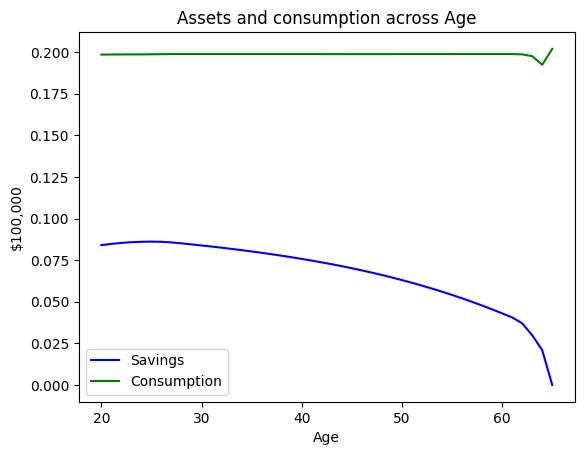

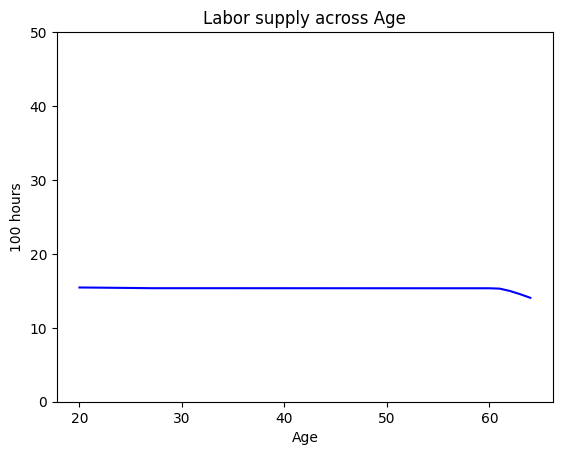

In [108]:
plt.plot(mean_a_1.index, mean_a_1.values, label='Savings', color='blue')
plt.plot(mean_c_1.index, mean_c_1.values, label='Consumption', color='green')
# Add labels and title
plt.xlabel('Age')
plt.ylabel('\$100,000')
plt.title('Assets and consumption across Age')
plt.legend()
# Show the plot
plt.show()

plt.plot(mean_h_1.index, mean_h_1.values, label='Labor supply', color='blue')
# Add labels and title
plt.xlabel('Age')
plt.ylabel('100 hours')
plt.title('Labor supply across Age')
plt.ylim(0, 50)

# Show the plot
plt.show()



Labor supply and consumption are mostly smooth across the life cycle, while assets move down to 0. Let's now set the coefficient on the terminal value function to 3 so that the agent has a reason to save and repeat the exercise.

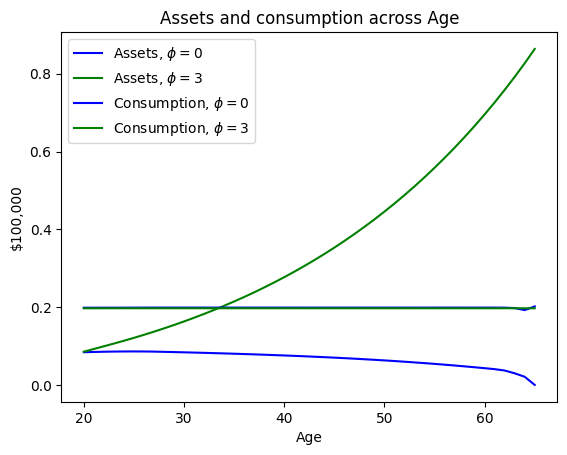

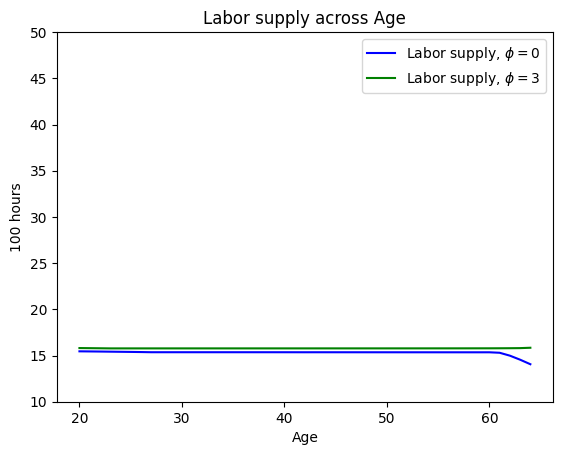

In [110]:
# terminal value function coefficient
params["phi"] = 3

# solve problem
out = solveProblem(M_grid,k_grid,**params)
policyC = out[0]
policyH = out[1]
endk    = out[2]
policyM = out[3]
# simulate
simdf = simulate(policyC, policyH, endk, policyM, params_sim)
mean_a_2 = simdf.groupby('age')['a'].mean() # savings
mean_c_2 = simdf.groupby('age')['c'].mean() # consumption
mean_h_2 = simdf.groupby('age')['h'].mean() # hours of work

# Visuals
plt.plot(mean_a_1.index, mean_a_1.values, label='Assets, $\phi=0$', color='blue')
plt.plot(mean_a_2.index, mean_a_2.values, label='Assets, $\phi=3$', color='green')
plt.plot(mean_c_1.index, mean_c_1.values, label='Consumption, $\phi=0$', color='blue',linestyle='--')
plt.plot(mean_c_2.index, mean_c_2.values, label='Consumption, $\phi=3$', color='green',linestyle='--')
# Add labels and title
plt.xlabel('Age')
plt.ylabel('\$100,000')
plt.title('Assets and consumption across Age')
plt.legend()
# Show the plot
plt.show()

plt.plot(mean_h_1.index, mean_h_1.values, label='Labor supply, $\phi=0$', color='blue')
plt.plot(mean_h_2.index, mean_h_2.values, label='Labor supply, $\phi=3$', color='green')
# Add labels and title
plt.xlabel('Age')
plt.ylabel('100 hours')
plt.title('Labor supply across Age')
plt.legend()
plt.ylim(10, 50)

# Show the plot
plt.show()


Keeping $\phi=3$, let's now add in uncertainty by specify $\sigma = 0.05$ (as in Imai and Keane).

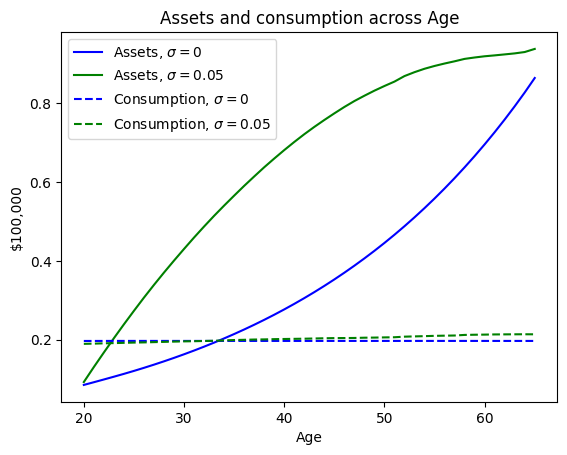

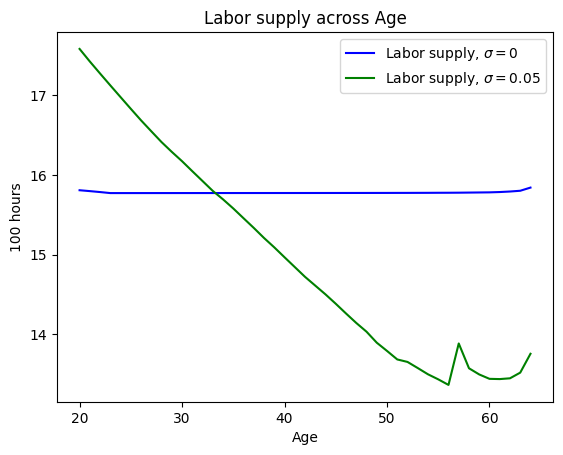

In [115]:
# terminal value function coefficient
params["sigma"] = 0.05
params_sim["sigma"] = 0.05
# solve problem
out = solveProblem(M_grid,k_grid,**params)
policyC = out[0]
policyH = out[1]
endk    = out[2]
policyM = out[3]
# simulate
simdf = simulate(policyC, policyH, endk, policyM, params_sim)
mean_a_3 = simdf.groupby('age')['a'].mean() # savings
mean_c_3 = simdf.groupby('age')['c'].mean() # consumption
mean_h_3 = simdf.groupby('age')['h'].mean() # hours of work

# Visuals
plt.plot(mean_a_2.index, mean_a_2.values, label='Assets, $\sigma=0$', color='blue')
plt.plot(mean_a_3.index, mean_a_3.values, label='Assets, $\sigma=0.05$', color='green')
plt.plot(mean_c_2.index, mean_c_2.values, label='Consumption, $\sigma=0$', color='blue',linestyle='--')
plt.plot(mean_c_3.index, mean_c_3.values, label='Consumption, $\sigma=0.05$', color='green',linestyle='--')
# Add labels and title
plt.xlabel('Age')
plt.ylabel('\$100,000')
plt.title('Assets and consumption across Age')
plt.legend()
# Show the plot
plt.show()

plt.plot(mean_h_2.index, mean_h_2.values, label='Labor supply, $\sigma=0$', color='blue')
plt.plot(mean_h_3.index, mean_h_3.values, label='Labor supply, $\sigma=0.05$', color='green')
# Add labels and title
plt.xlabel('Age')
plt.ylabel('100 hours')
plt.title('Labor supply across Age')
plt.legend()
# plt.ylim(10, 50)

# Show the plot
plt.show()

In [116]:
params_sim["sigma"] 

0.05

Uncertainty adds a strong precautionary motive; the agent consumes less at first and accumulates significant assets. Labor supply is now declining, starting off high and decreasing (almost) monotonically.

Finally, let's add in wage growth. We will do so at a "high" and a "low" level. High wage growth moves from 0.03 at the beginning of the lifecycle to 0.0 at the end; low wage growth is 0.01 throughout the lifecycle. I will also set $\beta = 0.98$.

In [121]:
params["beta"] = 0.98

# no growth
# solve problem
params["growth"] = np.linspace(0.00, 0., 45)
params_sim["growth"] = np.linspace(0.0, 0.0, 45)
out = solveProblem(M_grid,k_grid,**params)
policyC = out[0]
policyH = out[1]
endk    = out[2]
policyM = out[3]
# simulate
simdf = simulate(policyC, policyH, endk, policyM, params_sim)
mean_a_3 = simdf.groupby('age')['a'].mean() # savings
mean_c_3 = simdf.groupby('age')['c'].mean() # consumption
mean_h_3 = simdf.groupby('age')['h'].mean() # hours of work

# low growth
params["growth"] = np.linspace(0.01, 0.01, 45)
params_sim["growth"] = np.linspace(0.01, 0.01, 45)
# solve problem
out = solveProblem(M_grid,k_grid,**params)
policyC = out[0]
policyH = out[1]
endk    = out[2]
policyM = out[3]
# simulate
simdf = simulate(policyC, policyH, endk, policyM, params_sim)
mean_a_4 = simdf.groupby('age')['a'].mean() # savings
mean_c_4 = simdf.groupby('age')['c'].mean() # consumption
mean_h_4 = simdf.groupby('age')['h'].mean() # hours of work

# high growth
params["growth"] = np.linspace(0.03, 0.0, 45)
params_sim["growth"] = np.linspace(0.03, 0.0, 45)
# solve problem
out = solveProblem(M_grid,k_grid,**params)
policyC = out[0]
policyH = out[1]
endk    = out[2]
policyM = out[3]
# simulate
simdf = simulate(policyC, policyH, endk, policyM, params_sim)
mean_a_5 = simdf.groupby('age')['a'].mean() # savings
mean_c_5 = simdf.groupby('age')['c'].mean() # consumption
mean_h_5 = simdf.groupby('age')['h'].mean() # hours of work

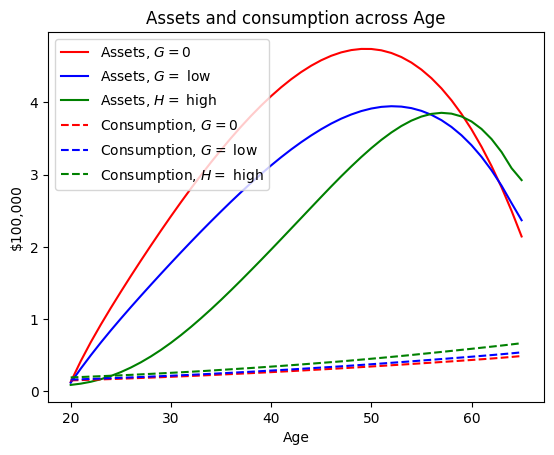

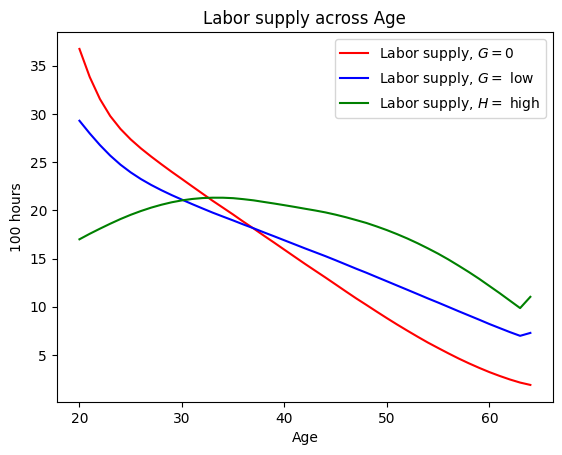

In [122]:
# Visuals
plt.plot(mean_a_3.index, mean_a_3.values, label='Assets, $G = 0$', color='red')
plt.plot(mean_a_4.index, mean_a_4.values, label='Assets, $G =$ low', color='blue')
plt.plot(mean_a_5.index, mean_a_5.values, label='Assets, $H = $ high', color='green')
plt.plot(mean_c_3.index, mean_c_3.values, label='Consumption, $G = 0$', color='red',linestyle='--')
plt.plot(mean_c_4.index, mean_c_4.values, label='Consumption, $G =$ low', color='blue',linestyle='--')
plt.plot(mean_c_5.index, mean_c_5.values, label='Consumption, $H = $ high', color='green',linestyle='--')
# Add labels and title
plt.xlabel('Age')
plt.ylabel('\$100,000')
plt.title('Assets and consumption across Age')
plt.legend()
# Show the plot
plt.show()

plt.plot(mean_h_3.index, mean_h_3.values, label='Labor supply, $G = 0$', color='red')
plt.plot(mean_h_4.index, mean_h_4.values, label='Labor supply, $G =$ low', color='blue')
plt.plot(mean_h_5.index, mean_h_5.values, label='Labor supply, $H = $ high', color='green')
# Add labels and title
plt.xlabel('Age')
plt.ylabel('100 hours')
plt.title('Labor supply across Age')
plt.legend()
# plt.ylim(10, 50)

# Show the plot
plt.show()

Wage growth pivots and inverts the profile of labor supply; agents now work more later in life, when wages are higher, than before. It is interesting to note that lifetime consumption only increases marginally -- the main affect is to change the timing of labor supply and increase retirement assets.

#### Next steps

This notebook is a work in progress, as it does not yet replicate the model of Imai and Keane. The clear next step is to add the human capital process. However, even with a simple human capital production function, the EGM solution method becomes quite complex. This is because when $E[ K_{t+1}]$ depends not just on $K_t$ but also on $h_t$, in the EGM step we will map each point in $t+1$ back onto a point in $t$ with not just a different level of $M_t$ (as above) but also a different level of $K_t$. That is, we get a kind of panel data: optimal choices at points in the state space $(M_t^i,K_t^j)$ where there is no systematic equality of points $M_t^i$ or $K_t^j$.

I plan to solve this by doing a Delauey triangulation on the convex hull of the covered state space in each EGM step, and then use a combination of limiting solutions and numerical methods to fill in the edges of the grid. Once human capital is in the model, I can also add the taste shocks, age effects, and adopt their terminal period value function.

Beyond the baseline replication, there are several further tests I would like to do:
1. Compare the accuracy of their solution using Chebyshev polynomials with that of the EGM 
2. Compare the estimation results using the measurement error SML vs. an SMM approach
3. Use a discrete hours choice and see the implications for human capital formation and labor supply compared to the continuous model

####